In [1]:
library(readxl)
library(dplyr)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

Warning message:
"package 'readxl' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [16]:
table(reservation_r$branch)



  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    49     18     12     22     15      8     14     10     10      6     20 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    21     22     20     22     13      4     17     10     17     19     10 
  종로   중구   중랑 
    13     18      6 

In [17]:
# 주문 취소되지 않은 경우만 선택
no_cancel_data <- reservation_r %>% filter(cancel == "N")


In [18]:
# 주문 취소되지 않은 예약 건의 부서별 빈도표
table(no_cancel_data$branch)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    41     17     12     19     15      8     11      7      8      5     14 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    18     20     18     17     12      4     15      8     16     18      8 
  종로   중구   중랑 
     7     15      4 

In [25]:
library(ggplot2)

In [26]:
# 강남, 마포, 서초 지점만 선택
    df_branch_sales <- df_f_join_2 %>%
    filter(branch == "강남" | branch == "마포" | branch == "서초") %>%
    group_by(branch, product_name) %>%           # 부서 이름과 메뉴 이름으로 그룹화
    summarise(sales_amt = sum(sales) / 1000)     # 매출 합산
 

In [27]:
# 데이터 분석을 위해 원천 데이터 가공(전처리)
# reserv_no를 키로 예약, 주문 테이블 연결
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

In [28]:
# item_id를 키로 df_f_join_1, 메뉴 정보 테이블 연결
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = "item_id")

In [29]:
head(df_f_join_2) # 테이블 세 개가 이너 조인된 것을 확인


reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales,product_name,product_desc,category_id,price
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000,JUICE,주스,BEVERAGE,6000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000,STEAK,스테이크,FOOD,35000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000,SANDWICH,샌드위치,FOOD,10000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000,SALAD_BAR,샐러드바,COMBO,25000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000,SEA_FOOD,씨푸드,FOOD,25000


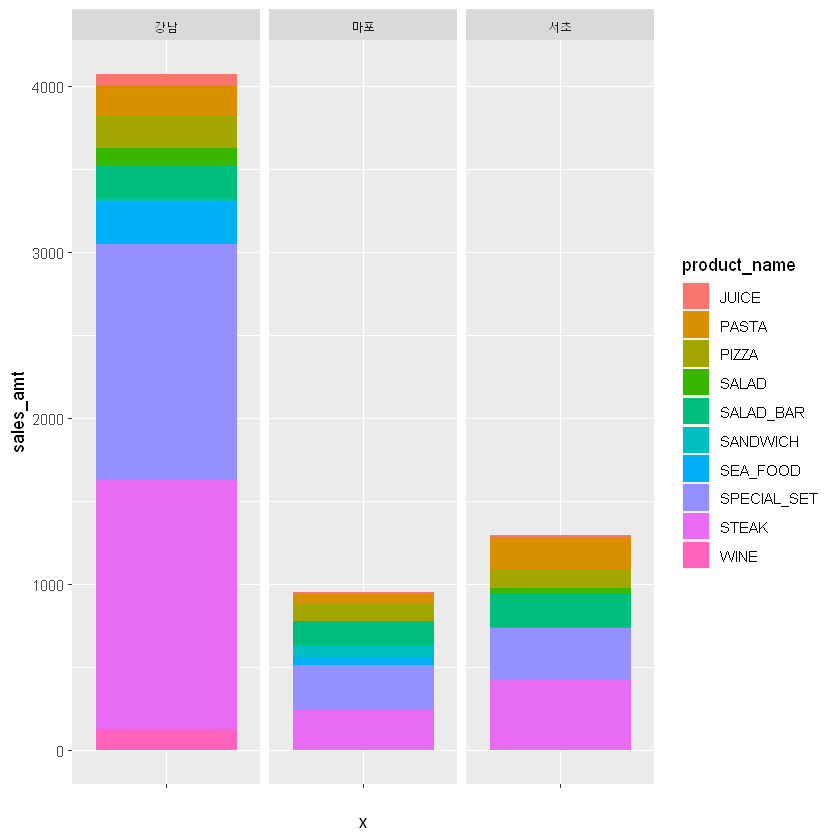

In [30]:
# 누적 막대 그래프 그리기
ggplot(df_branch_sales, aes(x = "", y = sales_amt, fill = product_name)) +
    facet_grid(facets = . ~ branch) + # 면 분할 함수 branch 기준으로 분할
    geom_bar(stat = "identity")


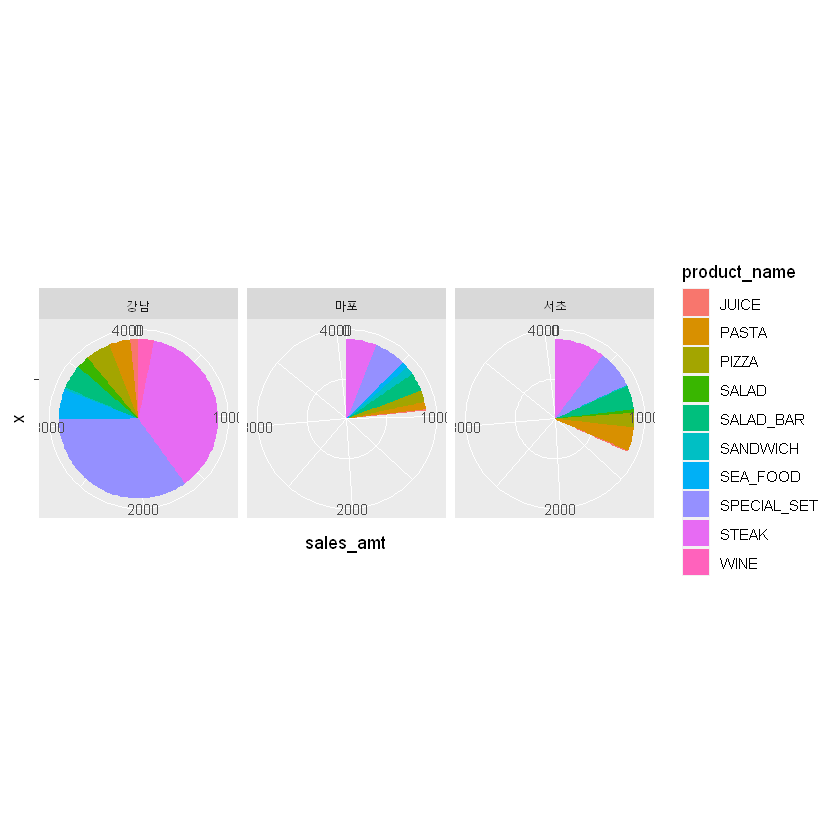

In [32]:
# 파이 차트로 그리기
ggplot(df_branch_sales, aes(x = "", y = sales_amt, fill = product_name)) +
    facet_grid(facets = . ~ branch) +
    geom_bar(stat = "identity") +
    coord_polar("y", start = 0)     # 파이 차트 그리기

In [33]:
# reserv_no를 키로 예약, 주문 테이블 연결
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

In [34]:
# item_id를 키로 df_f_join_1, 메뉴 정보 테이블 연결
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = "item_id")


In [35]:
# 주요 지점만 선택
df_branch_items <- df_f_join_2 %>% filter(branch == "강남" | branch == "마포" | branch == "서초")


In [36]:
# 교차 빈도표 생성
table(df_branch_items$branch, df_branch_items$product_name)

      
       JUICE PASTA PIZZA SALAD SALAD_BAR SANDWICH SEA_FOOD SPECIAL_SET STEAK
  강남     2     4     5     2         3        2        4          13    12
  마포     1     2     4     0         3        3        1           4     3
  서초     1     5     2     1         2        1        0           2     5
      
       WINE
  강남    5
  마포    0
  서초    0

In [37]:
df_branch_items_table <- as.data.frame(table(df_branch_items$branch, df_branch_items$product_name))

In [38]:
# 데이터 분석을 위해 데이터 가공
df_branch_items_percent <- df_branch_items_table %>%
    group_by(df_branch_items_table$Var1) %>%
    mutate(percent_items = Freq/sum(Freq) * 100) # 주문 비율을 계산해서 열 생성

In [39]:
head(df_branch_items_percent)                    # percent_items 열이 생성된 것을 확인


Var1,Var2,Freq,df_branch_items_table$Var1,percent_items
강남,JUICE,2,강남,3.846154
마포,JUICE,1,마포,4.761905
서초,JUICE,1,서초,5.263158
강남,PASTA,4,강남,7.692308
마포,PASTA,2,마포,9.523810
서초,PASTA,5,서초,26.315789


In [40]:
# 누적 막대 그래프를 그려 gg 변수에 담음
library(ggplot2)
gg <- ggplot(df_branch_items_percent, aes(x = Var1, y = percent_items, group = Var1, fill = Var2)) +
    geom_bar(stat = "identity")

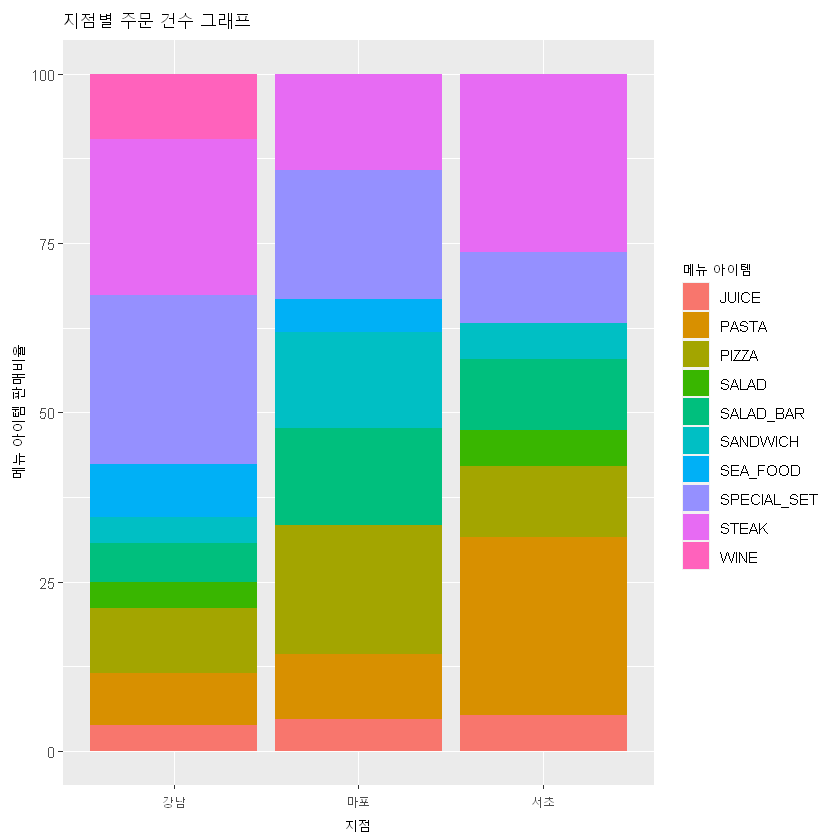

In [41]:
# 제목과 범례 이름 지정
gg <- gg +
    labs(title = "지점별 주문 건수 그래프", x = "지점", y = "메뉴 아이템 판매비율", fill = "메뉴 아이템")
gg
 

In [42]:
# 테이블조인
# reserv_no를 키로 예약, 주문 테이블 연결
df_rfm_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

head(df_rfm_join_1)     # 조인된 테이블 확인


reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000


In [43]:
# 고객 번호별 방문 횟수(F)와 매출(M) 정리
df_rfm_data <- df_rfm_join_1 %>%
    group_by(customer_id) %>%
    summarise(visit_sum = n_distinct(reserv_no), sales_sum = sum(sales) / 1000) %>%
    arrange(customer_id)

df_rfm_data     # 데이터 확인


customer_id,visit_sum,sales_sum
W1327595,2,188
W1327803,2,210
W1328432,3,246
W1328505,5,287
W1328786,1,10
W1328985,2,178
W1328993,1,140
W1329560,1,24
W1329954,1,48
W1329962,2,48


In [44]:
summary(df_rfm_data)     # df_rfm_data 요약 통계 값 확인

 customer_id          visit_sum       sales_sum      
 Length:170         Min.   :1.000   Min.   :   6.00  
 Class :character   1st Qu.:1.000   1st Qu.:  40.75  
 Mode  :character   Median :1.000   Median : 100.00  
                    Mean   :1.982   Mean   : 146.81  
                    3rd Qu.:3.000   3rd Qu.: 192.00  
                    Max.   :8.000   Max.   :1006.00  

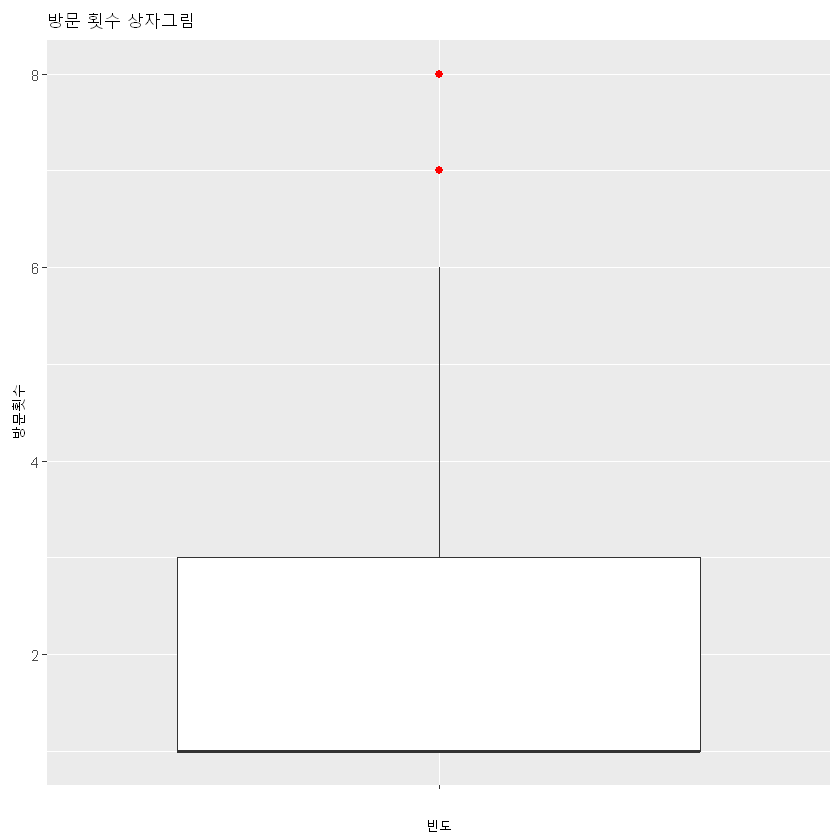

In [45]:
# 상자 그림 그리기
ggplot(df_rfm_data, aes(x = "", y = visit_sum)) +
    geom_boxplot(width = 0.8, outlier.size = 2, outlier.colour = "red") +
    labs(title = "방문 횟수 상자그림", x = "빈도", y = "방문횟수")

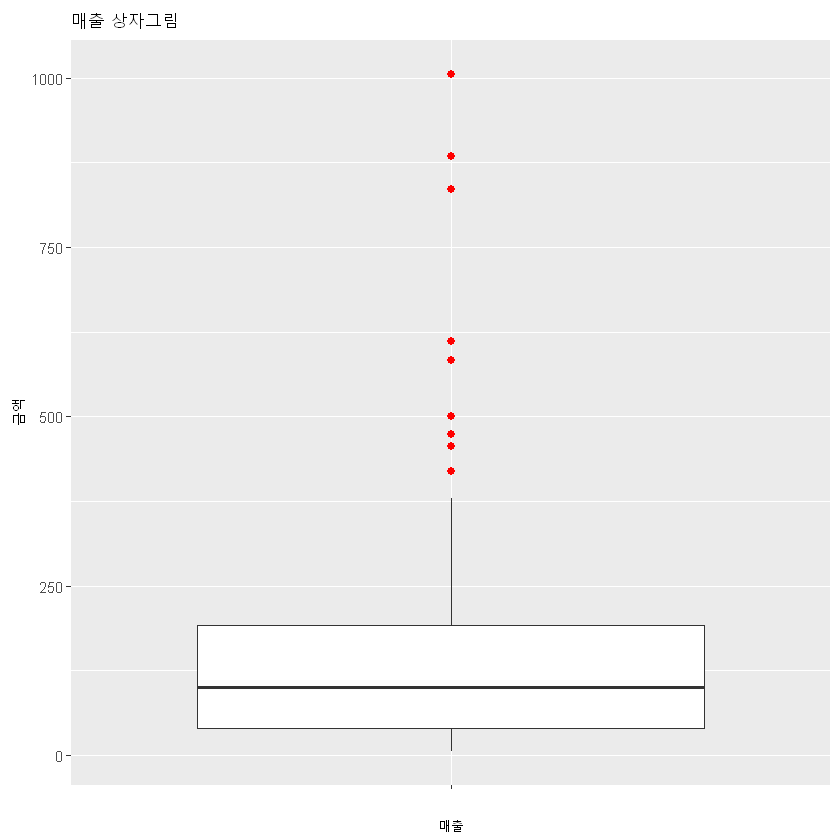

In [46]:
ggplot(df_rfm_data, aes(x = "", y = sales_sum)) +
    geom_boxplot(width = 0.8, outlier.size = 2, outlier.colour = "red") +
    labs(title = "매출 상자그림", x = "매출", y = "금액")
 

In [47]:
quantile(df_rfm_data$visit_sum, probs = c(0.6, 0.9))

60% 90% 
  2   4

In [48]:
quantile(df_rfm_data$sales_sum, probs = c(0.6, 0.9))

60%   90% 
135.0 304.1

In [50]:
total_sum_data <- df_rfm_data %>%
    summarise(t_visit_sum = sum(visit_sum), t_sales_sum = sum(sales_sum))

In [51]:
loyalty_sum_data <- df_rfm_data %>%
    summarise(l_visit_sum = sum(ifelse(visit_sum > 2, visit_sum, 0)), l_sales_sum = sum(ifelse(sales_sum > 135, sales_sum, 0)))

In [52]:
# 차지하는 비율 확인
loyalty_sum_data / total_sum_data

l_visit_sum,l_sales_sum
0.5163205,0.7496093


In [2]:
#-----------------------------------------
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# reserv_no를 키로 예약, 주문 테이블 연결
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")


In [3]:
# item_id를 키로 df_f_join_1, 메뉴 정보 테이블 연결
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = "item_id")


In [4]:
target_item <- c("M0005", "M0009")               # 스테이크와 와인

In [5]:
# 스테이크와 메뉴 아이템 동시 주문 여부 확인
df_stime_order <- df_f_join_2 %>%
    filter((item_id %in% target_item)) %>%       # 스테이크나 와인을 주문한 경우 선택
    group_by(reserv_no) %>%                      # 예약 번호로 그룹화
    mutate(order_cnt = n()) %>%                  # 그룹화된 행 세기
    distinct(branch, reserv_no, order_cnt) %>%   # 중복 예약 번호는 하나만 출력
    filter(order_cnt == 2) %>%                   # 2인 경우 선택(스테이크와 와인을 동시 주문한 경우)
    arrange(branch)

In [6]:
# 동시 주문인 경우의 예약 번호 데이터셋(12건)
df_stime_order

# A tibble: 12 x 3
# Groups: reserv_no [12]

branch,reserv_no,order_cnt
강남,2019123107,2
강남,2019122901,2
강남,2019122801,2
강동,2019122810,2
광진,2019122804,2
노원,2019112101,2
동대문,2019091201,2
동대문,2019122703,2
동작,2019112102,2
양천,2019123006,2


In [7]:
# 동시 주문한 예약 번호만 담는 stime_order 변수 생성
stime_order_rsv_no <- df_stime_order$reserv_no

In [8]:
# 동시 주문 예약 번호이면서 스테이크와 와인일 경우만 선택
df_stime_sales <- df_f_join_2 %>%
    filter((reserv_no %in% stime_order_rsv_no) & (item_id %in% target_item)) %>%
    group_by(reserv_no, product_name) %>%          # 예약 번호와 메뉴 아이템으로 그룹화
    summarise(sales_amt = sum(sales) / 1000) %>%   # 매출 합계 요약 계산
    arrange(product_name, reserv_no)               # 메뉴 아이템, 예약 번호 기준으로 정렬


In [9]:
# 동시 주문 12건이므로 매출 합계 24개 생성(스테이크+와인)
df_stime_sales
 

reserv_no,product_name,sales_amt
2019091201,STEAK,70
2019112101,STEAK,280
2019112102,STEAK,280
2019120202,STEAK,420
2019122702,STEAK,70
2019122703,STEAK,70
2019122801,STEAK,175
2019122804,STEAK,70
2019122810,STEAK,70
2019122901,STEAK,140


In [10]:
steak <- df_stime_sales %>% filter(product_name == "STEAK")   # 스테이크 정보만 담음
wine <- df_stime_sales %>% filter(product_name == "WINE")     # 와인 정보만 담음
 

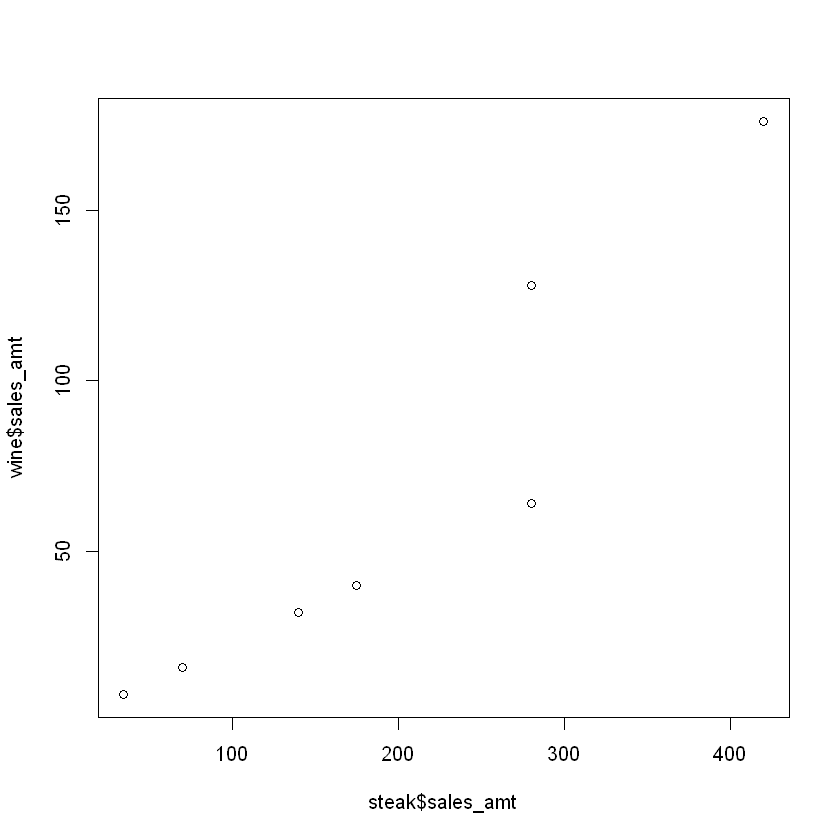

In [11]:
plot(steak$sales_amt, wine$sales_amt)     # 스테이크와 와인의 매출 상관도 그리기
 

In [12]:
cor.test(steak$sales_amt, wine$sales_amt)     # 상관관계 확인

Pearson's product-moment correlation

data: steak$sales_amt and wine$sales_amt
t = 9.5423, df = 10, p-value = 2.438e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
0.8244838 0.9859970
sample estimates:
      cor
0.9492339

ERROR: Error in parse(text = x, srcfile = src): <text>:3:8: 예기치 않은 INCOMPLETE_STRING입니다
11:       cor
12: 0.9492339
           ^
